Partie I

1) La somme des termes ∆tI est égale à la consommation (en Ah) lors du trajet qui doit nécessairement être inférieure à la capacité nominale de la batterie, d'où l'obtention de la contrainte 4). En autorisant les valeurs négatives dans la contrainte 3), on pourrait prendre en compte le cas des véhicules qui se rechargent au freinage, tout en gardant notre contrainte 4) inchangée.

2. α1: En prenant tous les autres coefficients nuls et une vitesse initiale nulle on constate que celui-ci conduit à une augmentation ou diminution de la vitesse on peut imaginer qu'il s'agit alors d'un coefficient lié à la vitesse du vent : négatif si le vent est défavorable et positif sinon.
   α2: Coefficient quantifiant les frottements visqueux.
   α3 : Coefficient quantifiant l'apport de l'assistance éléctrique dans l'accéleration du vélo.
   α4 : Coefficient quantifiant l'apport du pédalage du cycliste dans l'accéleration du vélo.

Impact du poids: à priori la masse du cycliste ne modifient pas les coefficients 1 et 2 ou seulement marginalement car les variations des coefficients de frottements dû à l'impact de la masse du cycliste sur sa prise au vent sont négligeables.

Les coefficients 3 et 4 dépendent également probablement plutôt des caractéristiques du vélo que de la masse du cycliste.

3.

$$ z= (x_i,v_i,I_i,T_i) $$ 

Soit au total 4(N+1) variables

$$f(z) = \sum_{i=1}^{N}T_{i}^2$$

Contrainte égalité:
$
v_0 = 0
$
;
$
v_N = 0
$
;
$
x_{i+1} -x_i - ∆t*v_i =0
$
;
$
v_{i+1} - v_i - ∆t(α_1 − α_2 * v_i + α_3*I_i + α_4*T_i − gγ(x_i))=0
$


Contrainte inégalités: 

$
-v_i<0
$
;
$
-I_i<0
$
;
$
I_i-I_m<0
$
;
$
\sum_{i=1}^{N}∆t*I_i - Q_{bat} <0
$

4. On constate aisement que f est convexe (combinaison linéaire à coefficients positifs de fonctions convexes), les contraintes inégalités sont convexes car affine et les contraintes égalités sont affines. Le problème est donc bien convexe.

Partie 2

5.
$
v_{i+1} - v_i = ∆t(α_1 − α_2 * v_i + α_3*I_i + α_4*T_i − gγ(x_i))
$

Donc on pose $ X = (y_1,y_2,y_3,y_4) $

$
A = ∆t * (\begin{array}{ccc}
   1 & -v_{0} & I_0 & T_0 \\
   \vdots & \vdots & \vdots  & \vdots \\
   1 & -v_{N-1} & I_{N-1} & T_{N-1} \\
\end{array})
$

$
b= (\begin{array}{ccc}
  v_{1}-v_{0}\\
   \vdots \\
   v_{N}-v_{N-1}\\
\end{array})
$

Et on cherche à minimiser:
$$\lVert (AX-b) \rVert^2$$
2

[[ 1.         -2.          5.74556696 12.15698719]
 [ 1.         -2.00000717  5.76067364 12.74411338]
 [ 1.         -2.00010254  5.02296507 13.19309303]
 ...
 [ 1.         -8.77579273  5.96461308  4.90423952]
 [ 1.         -8.77337443  6.30199587  4.90423952]
 [ 1.         -8.77105304  6.82317555  4.35164826]]
[ 7.17301850e-06  9.53628447e-05 -5.12915169e-05 ... -2.41830477e-03
 -2.32139148e-03 -2.25092717e-03]
[-0.29425586  0.02142857  0.02857143  0.01428571]
[0.         0.03287534 0.01661201 0.01205505]


C:\Users\TitouanL\AppData\Local\Temp\ipykernel_5288\4047297029.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vitesse predite'][0]=df['Vitesse [m/s]'][0]
C:\Users\TitouanL\AppData\Local\Temp\ipykernel_5288\4047297029.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vitesse predite'][i] = df['Vitesse predite'][i-1] + dt*(X[0] - X[1]*df['Vitesse predite'][i-1] + X[2]*df['I [A]'][i-1] + X[3]*df['Couple pédale [Nm]'][i-1])
C:\Users\TitouanL\AppData\Local\Temp\ipykernel_5288\4047297029.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Valu

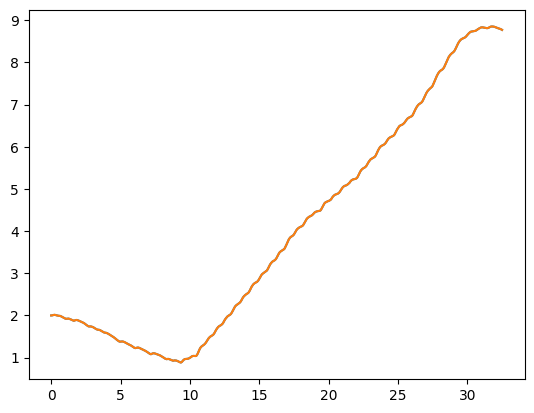

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls



df=pd.read_csv('data_velo.csv')

dt= 0.01

# filtrer à 3 chiffres après la virgule le dataframe
df['Vitesse [m/s]'] = df['Vitesse [m/s]']
df['I [A]'] = df['I [A]']
df['Couple pédale [Nm]'] = df['Couple pédale [Nm]']
df['Time [s]'] = df['Time [s]']


df['vitesse_décalée'] = df['Vitesse [m/s]'].shift(-1)





df = df.iloc[:-1]

df['B']=df['vitesse_décalée']-df['Vitesse [m/s]']

n=len(df)

# filtrer à 3 chiffres après la virgule


A= np.ones((n,4))
A[:,1]=-df['Vitesse [m/s]']
A[:,2]=df['I [A]']
A[:,3]=df['Couple pédale [Nm]']
B=np.array(df['B'])

print(A)
print(B)

A=dt*A


# On résout le problème en utilisant la méthode des moindres carrés

X = np.linalg.lstsq(A,B,rcond=None)[0]
print(X)
solution = nnls(A, B)[0]
print(solution)

df['Vitesse predite']=0
df['Vitesse predite'][0]=df['Vitesse [m/s]'][0]

for i in range(1,n):
    df['Vitesse predite'][i] = df['Vitesse predite'][i-1] + dt*(X[0] - X[1]*df['Vitesse predite'][i-1] + X[2]*df['I [A]'][i-1] + X[3]*df['Couple pédale [Nm]'][i-1])

plt.plot(df['Time [s]'],df['Vitesse predite'])
plt.plot(df['Time [s]'],df['Vitesse [m/s]'])
plt.show()


